In [2]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import glob
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats
import math
import matplotlib.path as mpath
import matplotlib.ticker as mticker
import xesmf as xe

In [3]:
vdir = 'ocn' # 'ocn' or 'ice'
vnam = 'photoC_diat_zint_2'#, 'photoC_diaz_zint', 'photoC_sp_zint']#,'photoC_diaz_zint','photoC_sp_zint'] # 'aice' # 'SST'
fdir = '/glade/campaign/cgd/cesm/CESM2-LE/'+ vdir + '/proc/tseries/day_1/' + vnam + '/'

fnam = 'b.e21.BSSP370cmip6.f09_g17.LE2-1301.003.pop.h.ecosys.nday1.photoC_diat_zint_2.20450102-20550101.nc'

ncfile = xr.open_dataset(fdir + fnam)
lon = ncfile.TLONG.values
lat = ncfile.TLAT.values

ok = ~np.isnan(lon)
xp = ok.ravel().nonzero()[0]
fp = lon[~np.isnan(lon)]
x  = np.isnan(lon).ravel().nonzero()[0]
lon[np.isnan(lon)] = np.interp(x, xp, fp)

ok = ~np.isnan(lat)
xp = ok.ravel().nonzero()[0]
fp = lat[~np.isnan(lat)]
x  = np.isnan(lat).ravel().nonzero()[0]
lat[np.isnan(lat)] = np.interp(x, xp, fp)

In [4]:
# b. Open up the areacello (area for ocean grid cells) file. I'll use this to calculate sea ice areal coverage
acdir = '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/Ofx/areacello/gn/files/d20190308/areacello_Ofx_CESM2_historical_r1i1p1f1_gn.nc'
acfil = xr.open_dataset(acdir)
areacello = acfil['areacello'].values # tarea <- ocean files
areacello_ocn = np.full([384,320], np.nan)
for i in np.arange(0,384):
    for j in np.arange(0,320):
        if np.isnan(ncfile['photoC_diat_zint_2'][180,i,j]) == False and ncfile["TLAT"][i,j] > 50:
            areacello_ocn[i,j] = areacello[i,j]


/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'areacello' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [5]:
acdir = '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/Ofx/areacello/gn/files/d20190308/areacello_Ofx_CESM2_historical_r1i1p1f1_gn.nc'
acfil = xr.open_dataset(acdir)
areacello = acfil['areacello'].values # tarea <- ocean files
arctic_ocn = np.full([384,320], np.nan)
for i in np.arange(0,384):
    for j in np.arange(0,320):
        if np.isnan(ncfile['photoC_diat_zint_2'][180,i,j]) == False and ncfile["TLAT"][i,j] > 66.5:
            arctic_ocn[i,j] = areacello[i,j]


/glade/u/apps/opt/conda/envs/npl-2024a/lib/python3.11/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'areacello' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [6]:
max_25 = np.zeros([14,384,320,50]); max_25_2 = np.zeros([14,384,320,50]); 
npp_tot = np.zeros([14,384,320,50]); npp_bloom = np.zeros([14,384,320,50]); 
for yrset in np.arange(0,14):
    yrnum = str(1970 + yrset*10)
    dir = np.loadtxt("/glade/u/home/cpayne/Projects/BloomLength/AnnualGC/" + yrnum + "_max_25.txt")
    max_25[yrset,:,:,:] = dir.reshape(384,320,50)
    dir = np.loadtxt("/glade/u/home/cpayne/Projects/BloomLength/AnnualGC/" + yrnum + "_max_25_2.txt")
    max_25_2[yrset,:,:,:] = dir.reshape(384,320,50)
    dir = np.loadtxt("/glade/u/home/cpayne/Projects/BloomLength/AnnualGC/" + yrnum + "_npp_bloom.txt")
    npp_bloom[yrset,:,:,:] = dir.reshape(384,320,50)
    dir = np.loadtxt("/glade/u/home/cpayne/Projects/BloomLength/AnnualGC/" + yrnum + "_npp_tot.txt")
    npp_tot[yrset,:,:,:] = dir.reshape(384,320,50)


In [7]:
npp_bloom = np.where(npp_bloom==0, np.nan, npp_bloom)
npp_tot = np.where(npp_tot==0, np.nan, npp_tot)
max_25 = np.where(max_25==0, np.nan, max_25)
max_25_2 = np.where(max_25_2==0, np.nan, max_25_2)

In [7]:
# i = 322; j = 193; # Bering
# i = 342; j = 194; # Chukchi
# i = 341; j = 275; # Hudson
i = 372; j = 176; # Central
# i = 373; j = 40;  # Greenland

print('Bloom NPP',np.mean(npp_bloom[0,i,j,:],axis=0),np.mean(npp_bloom[13,i,j,:],axis=0),
     np.mean(npp_bloom[13,i,j,:],axis=0)/np.mean(npp_bloom[0,i,j,:],axis=0))
print(np.std(npp_bloom[13,i,j,:],axis=0),np.std(npp_bloom[0,i,j,:],axis=0))
print('Total NPP',np.mean(npp_tot[0,i,j,:],axis=0),np.mean(npp_tot[13,i,j,:],axis=0),
     np.mean(npp_tot[13,i,j,:],axis=0)/np.mean(npp_tot[0,i,j,:],axis=0))
print(np.std(npp_tot[13,i,j,:],axis=0),np.std(npp_tot[0,i,j,:],axis=0))
print('Bloom NPP Prop',np.mean(npp_bloom[0,i,j,:]/npp_tot[0,i,j,:],axis=0),np.mean(npp_bloom[13,i,j,:]/npp_tot[13,i,j,:],axis=0),
     np.mean(npp_bloom[13,i,j,:]/npp_tot[13,i,j,:],axis=0)-np.mean(npp_bloom[0,i,j,:]/npp_tot[0,i,j,:],axis=0))
print(np.std(npp_bloom[13,i,j,:]/npp_tot[13,i,j,:],axis=0),np.std(npp_bloom[0,i,j,:]/npp_tot[13,i,j,:],axis=0))

print(stats.ttest_rel(npp_bloom[0,i,j,:], npp_bloom[13,i,j,:]))

Bloom NPP 0.006179407104233683 0.02126794129391353 3.441744642352868
0.0030023184466397715 0.004154620687413533
Total NPP 0.006894481702448349 0.02347430770607853 3.4047965777822573
0.0029115956537812742 0.00433970901860735
Bloom NPP Prop 0.8640903769784244 0.9051089457002236 0.04101856872179921
0.04790206244290507 0.17521464453468377
TtestResult(statistic=-22.16533521535094, pvalue=3.424768539580862e-27, df=49)


In [8]:
# a. Read in a shapefile of the sea ice masks (perennial ice, seasonal ice, open water)
ds_simask = xr.open_dataset('/glade/u/home/cpayne/Projects/BloomLength/Input/simask.nc')
si_clim = ds_simask["si_clim"]
si_ens = ds_simask["si_ens"]

# load the xarray lat/lon files from pop grid
TLONG = ncfile.TLONG
TLAT = ncfile.TLAT

# Rename TLON and TLAT coordinates to be lon and lat so we can join them with sea ice data
TLONG = TLONG.rename({'nlon':'lon','nlat':'lat'})
TLAT =  TLAT.rename({'nlon':'lon','nlat':'lat'})

# reset sea ice lat/lon coordinates since TLON looks weird (above)
si_clim['TLON'] = TLONG
si_clim['TLAT'] = TLAT

si_ens['TLON'] = TLONG
si_ens['TLAT'] = TLAT

#Now rename TLON and TLAT coordinates to be lon and lat because regridders needs that specific naming
si_clim = si_clim.rename({'TLON':'lon','TLAT':'lat'})
si_ens = si_ens.rename({'TLON':'lon','TLAT':'lat'})

In [8]:
i = 373; j = 40
si_ens[:,0,i,j].values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
# Setting up a target grid 
# Do not include 90N and 90S otherwise cartopy gets rage-y (i.e. it doesn't work) when plotting
lat_new = np.arange(-89.5,90.0,0.5) 
lon_new = np.arange(0.0,361.0,1.0)

#create a meshgrid (2D fields of lats and lons)
lon2d,lat2d=np.meshgrid(lon_new,lat_new) 
#set up the target grid as an xarray Dataset
target_grid=xr.Dataset({'lat': (['y', 'x'], lat2d),'lon': (['y', 'x'], lon2d)})

#input grid, output grid, method, keyword arguments
regridder = xe.Regridder(si_clim, target_grid, 'nearest_s2d',periodic=True,reuse_weights=False)

# actually do the regridding
si_clim_regrid = regridder(si_clim)
si_ens_regrid = regridder(si_ens)

/glade/derecho/scratch/cpayne/tmp/ipykernel_7772/2264542686.py:11: RuntimeWarning: Mean of empty slice
  data_plt = np.round(np.nanmean(si_ens_regrid[:,yr,:,:],axis=0),0)


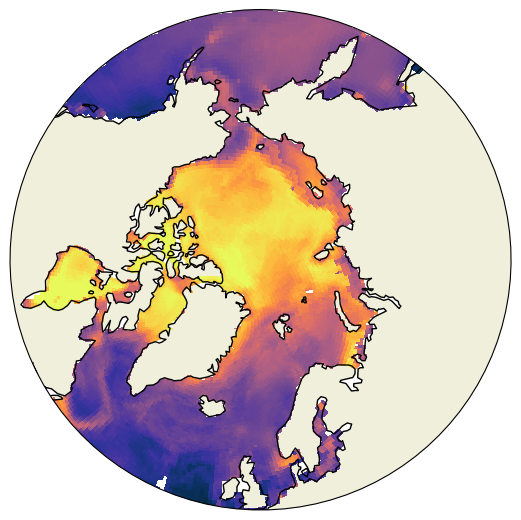

In [17]:
# make circular boundary for polar stereographic circular plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

fig = plt.figure(figsize = (6.5,6.5))
# fig = plt.figure(figsize = (2.5,2.5))
# fig = plt.figure(figsize = (3,3))
yr = 13
data_plt = np.round(np.nanmean(si_ens_regrid[:,yr,:,:],axis=0),0)
vari = np.mean(npp_bloom[yr,:,:,:]/npp_tot[yr,:,:,:], axis=2)
ax = plt.axes(projection=ccrs.NorthPolarStereo()); 
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 50, 90], crs = ccrs.PlateCarree());
pc = ax.pcolormesh(lon, lat, vari*100, 
                    transform=ccrs.PlateCarree(), vmin = 20, vmax = 90, cmap='cmo.thermal');
# this1=ax.contour(lon2d,lat2d,data_plt, levels = np.arange(0,3,1),
#                  colors=['limegreen','darkviolet'],linestyles='solid', linewidths=1.5,
#                  transform=ccrs.PlateCarree())    
ax.coastlines();  ax.add_feature(cfeature.LAND); #plt.colorbar(pc, orientation='horizontal', extend='both');
# plt.colorbar(pc, extend='both')
figdir = '/glade/u/home/cpayne/Projects/BloomLength/PresentationFigs/2100NPPprop.png';
# figdir = '/glade/u/home/cpayne/Projects/BloomLength/Figures/Fig3acbar.png';
plt.savefig(figdir,facecolor='none', dpi = 600);
# plt.close()


In [22]:
np.nanmax(vari)

0.9614559297908924

In [23]:
i = 342; j= 194
print(np.nanmean(npp_tot[0,i,j,:]))

0.0842215884848369


In [53]:
yr2 = 13 # 5 = 2020, 8 = 2050, 13 = 2100
vari = npp_bloom[0,:,:,:]/(max_25_2[0,:,:,:]-max_25[0,:,:,:])
vari2 = npp_bloom[yr2,:,:,:]/(max_25_2[yr2,:,:,:]-max_25[yr2,:,:,:])
varichange = np.full([384,320],np.nan)
for i in np.arange(0,384):
    for j in np.arange(0,320):
        if np.isnan(areacello_ocn[i,j]) == False:
            ttest = stats.ttest_rel(vari[i,j,:], vari2[i,j,:])
            if ttest.pvalue < 0.05:
                varichange[i,j] = (np.nanmean(vari2[i,j,:]) - np.nanmean(vari[i,j,:]))/np.nanmean(vari[i,j,:])*100
                

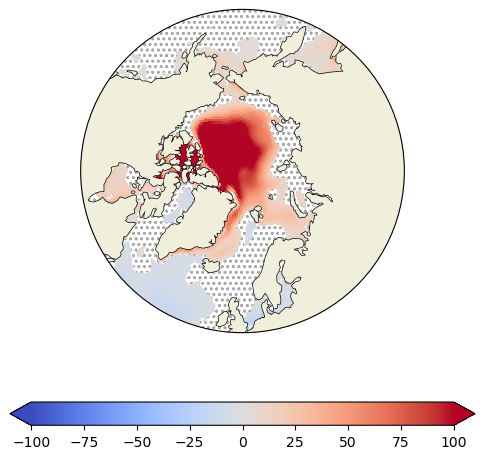

In [36]:
# make circular boundary for polar stereographic circular plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
# fig = plt.figure(figsize = (2.5,2.5))
fig = plt.figure(figsize = (6,6))
ax = plt.axes(projection=ccrs.NorthPolarStereo()); 
plt.rcParams['hatch.color'] = 'darkgray'
ax.contourf(lon, lat, areacello,
            transform=ccrs.PlateCarree(),
            colors='none',
            # levels = [.9,1.1],
            zorder = 0,
            hatches=['...'])
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 50, 90], crs = ccrs.PlateCarree());
pc = ax.pcolormesh(lon, lat,varichange, 
                    transform=ccrs.PlateCarree(), vmin = -100, vmax = 100, cmap='coolwarm',zorder=1);
ax.coastlines();  ax.add_feature(cfeature.LAND,zorder=2); plt.colorbar(pc, orientation='horizontal', extend='both');
# figdir = '/glade/u/home/cpayne/CESM2LE/PresentationFigs/2100NPPprop.png';
# figdir = '/glade/u/home/cpayne/Projects/BloomLength/Figures/Fig3dcbar.png';
# plt.savefig(figdir,facecolor='none', dpi = 600);
# plt.close()

In [52]:
yr2 = 13 # 5 = 2020, 8 = 2050, 13 = 2100
data_plt = np.round(np.nanmean(si_ens_regrid[:,0,:,:],axis=0),0)
data_plt2 = np.round(np.nanmean(si_ens_regrid[:,yr2,:,:],axis=0),0)
vari = npp_tot[0,:,:,:]#/(max_25_2[0,:,:,:]-max_25[0,:,:,:])
vari2 = npp_tot[yr2,:,:,:]#/(max_25_2[yr2,:,:,:]-max_25[yr2,:,:,:])
emergence = np.full([384,320],np.nan); highrange = np.full([384,320],np.nan); lowrange = np.full([384,320],np.nan)
for i in np.arange(0,384):
    for j in np.arange(0,320):
        if np.isnan(areacello_ocn[i,j]) == False:
            highrange[i,j] = np.nanmean(vari[i,j,:]) + (2*np.nanstd(vari[i,j,:]))
            lowrange[i,j] = np.nanmean(vari[i,j,:]) - (2*np.nanstd(vari[i,j,:]))
            if np.nanmean(vari2[i,j,:]) > highrange[i,j] or np.nanmean(vari2[i,j,:]) < lowrange[i,j]:
                emergence[i,j] = 1

/glade/derecho/scratch/cpayne/tmp/ipykernel_53124/3509805679.py:2: RuntimeWarning: Mean of empty slice
  data_plt = np.round(np.nanmean(si_ens_regrid[:,0,:,:],axis=0),0)
/glade/derecho/scratch/cpayne/tmp/ipykernel_53124/3509805679.py:3: RuntimeWarning: Mean of empty slice
  data_plt2 = np.round(np.nanmean(si_ens_regrid[:,yr2,:,:],axis=0),0)


In [53]:
print(np.nansum(emergence * arctic_ocn)/np.nansum(arctic_ocn),np.nansum(emergence * areacello_ocn)/np.nansum(areacello_ocn))


0.5344223887005404 0.4971836630611007


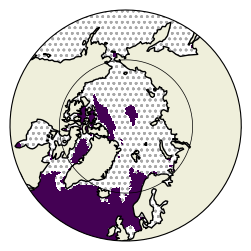

In [41]:
# make circular boundary for polar stereographic circular plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

fig = plt.figure(figsize=(3,3)) 
ax = plt.axes(projection=ccrs.NorthPolarStereo()); 
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 50, 90], crs = ccrs.PlateCarree());
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=.5, color='black')
gl.ylocator = mticker.FixedLocator([66.5])
gl.xlocator = mticker.FixedLocator([])
plt.rcParams['hatch.color'] = 'darkgray'
ax.contourf(lon, lat, areacello,
            transform=ccrs.PlateCarree(),
            colors='none',
            # levels = [.9,1.1],
            zorder = 0,
            hatches=['...'])
pc = ax.pcolormesh(lon, lat, emergence, 
                   transform=ccrs.PlateCarree(), zorder = 1); 
ax.coastlines();  ax.add_feature(cfeature.LAND, zorder = 1); 
figdir = '/glade/u/home/cpayne/Projects/BloomLength/Figures/FigS4f.png';
plt.savefig(figdir,facecolor='none', dpi = 600);


In [65]:
yr2 = 13 # 5 = 2020, 8 = 2050, 13 = 2100
vari = npp_bloom[0,:,:,:]/npp_tot[0,:,:,:]#/(max_25_2[0,:,:,:]-max_25[0,:,:,:])
vari2 = npp_bloom[yr2,:,:,:]/npp_tot[yr2,:,:,:]#/(max_25_2[yr2,:,:,:]-max_25[yr2,:,:,:])
varichange = np.full([384,320],np.nan)
for i in np.arange(0,384):
    for j in np.arange(0,320):
        if np.isnan(areacello_ocn[i,j]) == False:
            ttest = stats.ttest_rel(vari[i,j,:], vari2[i,j,:])
            if ttest.pvalue < 0.05:
                varichange[i,j] = (np.nanmean(vari2[i,j,:]) - np.nanmean(vari[i,j,:]))*100#/np.nanmean(vari[i,j,:])*100


/glade/derecho/scratch/cpayne/tmp/ipykernel_29274/4039393330.py:12: RuntimeWarning: Mean of empty slice
  data_plt = np.round(np.nanmean(si_ens_regrid[:,yr,:,:],axis=0),0)


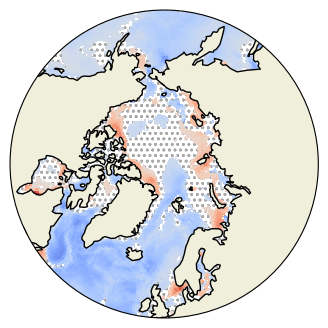

In [66]:
# make circular boundary for polar stereographic circular plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# fig = plt.figure(figsize = (6.5,6.5))
# fig = plt.figure(figsize = (2.5,2.5))
# fig = plt.figure(figsize = (3,3))
fig = plt.figure(figsize = (4,4))
# yr = 13
data_plt = np.round(np.nanmean(si_ens_regrid[:,yr,:,:],axis=0),0)
vari = np.mean(npp_bloom[0,:,:,:]/npp_tot[0,:,:,:], axis=2)
vari2 = np.mean(npp_bloom[yr,:,:,:]/npp_tot[yr,:,:,:], axis=2)
ax = plt.axes(projection=ccrs.NorthPolarStereo()); 
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 50, 90], crs = ccrs.PlateCarree());
ax.contourf(lon, lat, areacello,
            transform=ccrs.PlateCarree(),
            colors='none',
            # levels = [.9,1.1],
            zorder = 0,
            hatches=['...'])
pc = ax.pcolormesh(lon, lat, varichange, zorder = 1,
                    transform=ccrs.PlateCarree(), vmin = -50, vmax = 50, cmap='coolwarm');
# this1=ax.contour(lon2d,lat2d,data_plt, levels = np.arange(0,3,1),
#                  colors=['limegreen','darkviolet'],linestyles='solid', linewidths=1.5,
#                  transform=ccrs.PlateCarree())    
ax.coastlines();  ax.add_feature(cfeature.LAND, zorder = 1); #plt.colorbar(pc, orientation='horizontal', extend='both');
# plt.colorbar(pc, extend='both')
# figdir = '/glade/u/home/cpayne/CESM2LE/PresentationFigs/2100NPPprop.png';
# figdir = '/glade/u/home/cpayne/Projects/BloomLength/Figures/Fig3acbar.png';
# plt.savefig(figdir,facecolor='none', dpi = 600);
# plt.close()

In [8]:
si1970 = np.full([384,320],np.nan); siyr = np.full([384,320],np.nan); 
sichange = np.full([384,320],np.nan)
yr1 = 13 #5 = 2020, 8 = 2050, 13 = 2100
for i in np.arange(0,384):
    for j in np.arange(0,320):
        if np.isnan(areacello_ocn[i,j]) == False:
            si1970[i,j] = np.round(np.nanmean(si_ens[:,0,i,j]),0)
            siyr[i,j] = np.round(np.nanmean(si_ens[:,yr1,i,j]),0)
            if si1970[i,j] == 0:
                if siyr[i,j] == 0:
                    sichange[i,j] = 0 #Ice free -> ice free
                if siyr[i,j] == 1:
                    sichange[i,j] = 1 #Ice free -> seasonal
                if siyr[i,j] == 2:
                    sichange[i,j] = 2 #Ice free -> perennial
            if si1970[i,j] == 1:
                if siyr[i,j] == 0:
                    sichange[i,j] = 3 #Seasonal -> ice free
                if siyr[i,j] == 1:
                    sichange[i,j] = 4 #Seasonal -> seasonal
                if siyr[i,j] == 2:
                    sichange[i,j] = 5 #Seasonal -> perennial
            if si1970[i,j] == 2:
                if siyr[i,j] == 0:
                    sichange[i,j] = 6 #Perennial -> ice free
                if siyr[i,j] == 1:
                    sichange[i,j] = 7 #Perennial -> seasonal
                if siyr[i,j] == 2:
                    sichange[i,j] = 8 #Perennial -> perennial

In [9]:
si_zone = np.full([384,320],np.nan)
for i in np.arange(0,384):
    for j in np.arange(0,320):
        if sichange[i,j] == 6 or sichange[i,j] == 7 or sichange[i,j] == 8:# or sichange[i,j] == 5 or sichange[i,j] == 7 or sichange[i,j] == 8:
            si_zone[i,j] = areacello_ocn[i,j]
            

In [15]:
import numpy.ma as ma
npp_simean = np.zeros([50]); npp_simean2 = np.zeros([50])
yr = 5
for ens in np.arange(0,50):
    npp_simean[ens] = np.nansum((npp_bloom[0,:,:,ens]/(max_25_2[0,:,:,ens] - (max_25[0,:,:,ens]))) * si_zone)/np.nansum(si_zone)
    npp_simean2[ens] = np.nansum((npp_bloom[yr,:,:,ens]/(max_25_2[yr,:,:,ens] - (max_25[yr,:,:,ens]))) * si_zone)/np.nansum(si_zone)


In [67]:
import numpy.ma as ma
npp_simean = np.zeros([50]); npp_simean2 = np.zeros([50]);npp_simean3 = np.zeros([50])
yr = 5
yr2 = 13
for ens in np.arange(0,50):
    npp_simean[ens] = np.nansum((npp_bloom[0,:,:,ens]/(npp_tot[0,:,:,ens])) * arctic_ocn)/np.nansum(arctic_ocn)
    npp_simean2[ens] = np.nansum((npp_bloom[yr,:,:,ens]/(npp_tot[yr,:,:,ens])) * arctic_ocn)/np.nansum(arctic_ocn)
    npp_simean3[ens] = np.nansum((npp_bloom[yr2,:,:,ens]/(npp_tot[yr2,:,:,ens])) * arctic_ocn)/np.nansum(arctic_ocn)


In [69]:
import numpy.ma as ma
npp_simean = np.zeros([50]); npp_simean2 = np.zeros([50]);npp_simean3 = np.zeros([50])
yr = 5
yr2 = 13
for ens in np.arange(0,50):
    npp_simean[ens] = np.nansum((npp_bloom[0,:,:,ens]/(npp_tot[0,:,:,ens])) * areacello_ocn)/np.nansum(areacello_ocn)
    npp_simean2[ens] = np.nansum((npp_bloom[yr,:,:,ens]/(npp_tot[yr,:,:,ens])) * areacello_ocn)/np.nansum(areacello_ocn)
    npp_simean3[ens] = np.nansum((npp_bloom[yr2,:,:,ens]/(npp_tot[yr2,:,:,ens])) * areacello_ocn)/np.nansum(areacello_ocn)


In [70]:
print(np.mean(npp_simean),np.mean(npp_simean2),np.mean(npp_simean3))

0.6356738830780624 0.6134685714445675 0.5724143559602352


In [46]:
print(np.mean(npp_simean),np.mean(npp_simean2),np.mean(npp_simean)-np.mean(npp_simean2),np.std(npp_simean))

0.5364939533376777 0.5118901476791072 0.024603805658570455 0.02233699178007837


In [17]:
.234/.152


1.5394736842105265

In [57]:
np.nan(np.mean(npp_bloom[0,:,:,:]/npp_bloom[0,:,:,:],axis = 2)*areacello_ocn)

TypeError: 'float' object is not callable